# Fourier analysis
$$\newcommand{\sinn}{\sin\left(\frac{n\pi}{L} x\right)} \newcommand{\cosn}{\cos\left(\frac{n\pi}{L} x\right)} \newcommand{\diff}{\mathop{}\!\mathrm{d}}$$ 

## Pre-requisites
The notebook on [complex numbers](Complex.ipynb) is required reading before this one.

## The Fourier series: a little history

$$
f(x) = a_0 + \sum_{n=1}^\infty \left[a_n\cosn + b_n \sinn\right]
$$

This is a Fourier series representation of a function $f(x)$ defined over the interval $[-L,L]$. Equivalently, it represents a periodic function with period $T=2L$. It tells us that such a function can be expressed as an infinite sum of sine and cosine functions, one for each integer $n \in \{1,2,3,...\}$, each with with its own weighting $a_n$ and $b_n$. 

If this seems quite abstract, I hope that by reading through this notebook and playing with the code it will become clear how this came about, and why it's such an important part of mathematics and physics.

A good way to understand Fourier series (and eventually transforms) is to go back to its origins. Before Joseph Fourier came to the scene, it was already known, thanks to Daniel Bernoulli and Euler among others, that many functions could be written as trigonometric series like the above. For instance, the displacement of a vibrating string could be represented as an infinite sum of its natural mode shapes:

$$
u(x) = \sum_{n=1}^\infty \sinn
$$

with $L$ being the length of the string, and mode numbers $n\in \{1, 2, 3, ...\}$. This particular form (with only sines) applies for a string rigidly fixed at both ends. Whether sines or cosines or mixtures of both appear in the series depends on the particulars of the function or problem (we'll later see what). Fourier's radical leap was to suggest that *any* function (even discontinuous and not very well behaved ones) could be expressed as an infinite trigonometric sum. This was fairly controversial at the time (and formal proof of this would come much later through Dirichlet, Riemann and others), so Fourier was subject to some criticism from his peers for lack of rigour. Nonetheless, he developed what is now called Fourier analysis while studying heat flow, culminating in his influential book [The Analytical Theory of Heat](https://www.cambridge.org/core/books/analytical-theory-of-heat/F6D4802336FABD1116DDA4AA3FE6EFAA). The modern foundations for this topic were born out of his work on the heat equation, a partial differential equation (PDE) that describes how the temperature $u$ in some material evolves over time.

## Solving the heat equation 

Here is the heat equation in one spatial dimension $x$ (to keep things simple). In one dimension it could describe how temperature $u$ varies along a rod:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}\tag{1}
$$

This is a diffusion equation (a *parabolic* PDE), and the constant $D$ is the diffusion coefficient (*thermal diffusivity*), a property of the medium, which tells us how quickly heat spreads through the material. This kind of equation applies to many diffusion-type phenomena, including diffusion of sound energy (e.g. in statistical room acoustics). We won't spend too much time on the physical interpretation but rather focus on Fourier's mathematical approach. 

Provided the geometry is simple enough, you can use separation of variables to solve this equation. This means assuming that the temperature $u$ is composed of the product of two independent terms: one being purely time dependent, and one being purely space dependent:

$$u=X(x)\cdot T(t)$$
 
If this seems like a wild guess, it's because it is. It may seem needlessly restrictive, ruling out a lot of possible behaviours. But keep in mind that we're dealing with a differential equation that admits multiple (even infinite) solutions. In fact (**spoiler alert**) the full solution often ends up being a sum of such separable solutions:

$$u(x,t) = X_1(x)T_1(t) + X_2(x) T_2(t) + X_3(x)T_3(x) + ...$$ 

so that each shape $X_n(x)$ has its own distinct decay factor $T_n(t)$. The result is complex behaviour that predicts experimental results to high degree of accuracy.

So, if we plug this form of $u=X(x)T(t)$ into the heat equation, we find that we can neatly separate the time and space dependent parts on either side of the equation. This is because $T(t)$ is constant under differentiation over $x$, and vice-versa $X(x)$ is constant when differentiating over $t$. So we get:

$$
D\frac{X''(x)}{X(x)}=\frac{T'(t)}{T(t)}
$$

Here the prime indicates differentiation (and double prime is differentiating twice). The trick to continuing here is to think that since the left hand side cannot vary with time, the right hand side must not either! This means $T'/T$ is constant, and so is $X''/X$ and they are equal. We will name this constant  $\lambda$:

$$
D\frac{X''(x)}{X(x)}=\frac{T'(t)}{T(t)}=\lambda
$$
And now we have two equations:

$$
X''(x)=\frac{\lambda}{D} X(x)
$$

$$
T'(t)=\lambda T(t)
$$

These are now ordinary differential equations (ODEs) and can be solved independently and more easily.

Let's look at the time dependence $T$. We're looking for a function $T(t)$ that, when differentiated once, returns itself times a constant. The exponential $e^{\lambda t}$ fits the bill, and this is so by definition! $e^x$ is the function that satisfies $f(x)=f'(x)$.
So we've found half of the solution $$u=X(x)\cdot e^{\lambda t}$$ 

Not bad. However, there's a little problem: $\lambda$ can't be a positive number. 

If $\lambda$ is positive, the temperature will increase exponentially over time, which would violate energy conservation: we're adding free energy over time into the system, when we expect it to be dissipated. $\lambda>0$ is still mathematically valid, but not physical! 

Let's go back, and to make things easier to interpret we introduce a negative sign, and assume that $\lambda$ is a positive physical quantity. This fixes our time dependence (this also has some interesting consequences to the space dependent equation). The time dependence is now:

$$
T'(t)=-\lambda T(t) \tag{2}
$$

So now $T(t)=e^{-\lambda t}$ and we're happy. Well, almost. We can see that temperature will decay exponentially over time to zero, the equilibrium temperature, but there could also be some unknown constant in the mix: $T(t)=C e^{\lambda t}$. Not to mention that we still have no idea what $\lambda$ is, and for this to be any use we ought to find out how quickly the temperature will decay.

Where Fourier series come into play here is through $X(x)$. For simplicity let's introduce another constant $k^2=\lambda/D$. And here's our ODE for the spatial dependence:

$$
X''(x)=- k^2 X(x) \tag{3}
$$

So the temperature distribution along this rod needs to be a function whose second derivative is equal to itself (times a constant). This is a property that the sine and cosine functions have, so they should work as valid values of $X(x)$. It may seem strange to jump to a solution like this, but as you may have seen by now, wild guessing is the name of the game.
So we plug in a wild guess, $X(x) = \sin(k x)$ and we get:

$$\frac{d^2 \sin(k x)}{dx^2} = -k^2 \sin (k x)$$ 

This works. And now $\cos(k x)$ instead:

$$\frac{d^2 \cos(k x)}{dx^2} = -k^2 \cos (k x)$$

This works too. The argument of cosine and sine could also have an additional constant, like $\cos(k x + \phi)$, since on differentiation, $\phi$ doesn't come out of the argument of the cosine (using the chain rule): 

$$\frac{d^2\cos(k x + \phi)}{dx^2}=-k^2\cos(k x + \phi)$$

And that's still a valid solution.

Somewhat surprisingly, the exponential $e^{k x}$ doesn't work!

$$\frac{d^2 e^{k x}}{dx^2} = {\color{Red}+}k^2 e^{k x}$$

The sign ends up wrong on the RHS. So surely flipping the sign of the exponent would? No. Plugging in $e^{-k x}$ still results in a plus sign on the RHS after double differentiation since $(-k)^2=+k^2$.

But inserting the imaginary unit $i$ into the exponent $e^{ik x}$ (or $e^{-ik x}$) does work, as the sign will flip correctly after differentiating twice (because $i^2=-1$ of course)! 

$$\frac{d^2 e^{ik x}}{dx^2} = -k^2 e^{ik x}$$

We know (thanks to Euler's hard work) that $e^{ix}$ is a combination of a cosine (real part) and a sine (the imaginary part), so we can see why that worked. ([See the notebook on complex numbers which is best to have looked at first](Complex.ipynb))

Now we have some solutions, but any linear combinations of valid solutions for $X(x)$ also work, like 

$$X(x)=A\cos(k x) + B\sin(k x)$$

Here we have some unknown constants $A$ and $B$.
You can try plugging this into Equation (3) and you will see it all checks out, since differentiation applies separately to each component of the sum.

We have to remember that we haven't pinned down a value of $k$, since $\lambda$ isn't known. There could be multiple valid values of $k$, and this will depend on any additional constraints we put on the system. If $k$ could only have certain discrete values, then a valid solution could end up being an infinite series, like:

$$
X(x)=\sum_{n=1}^{\infty}\left(A_n \cos(k_n x) + B_n \sin (k_n x)\right)
$$

This is quite interesting. The temperature distribution could be an infinite sum of sines and cosines. Fourier thought - without much rigorous justification - that *any* function could be represented as a sum of such harmonics. Daniel Bernoulli had previously come to a similar conclusion while tackling problems on vibrating strings. 

Indeed a lot of function shapes are possible with just a few harmonics. Play with the code below, where you can change the values of the series coefficients. $a_n$ and $b_n$ are the sine and cosine coefficients respectively. See what happens to the sum when only sines, only cosines or a mixture are used. 

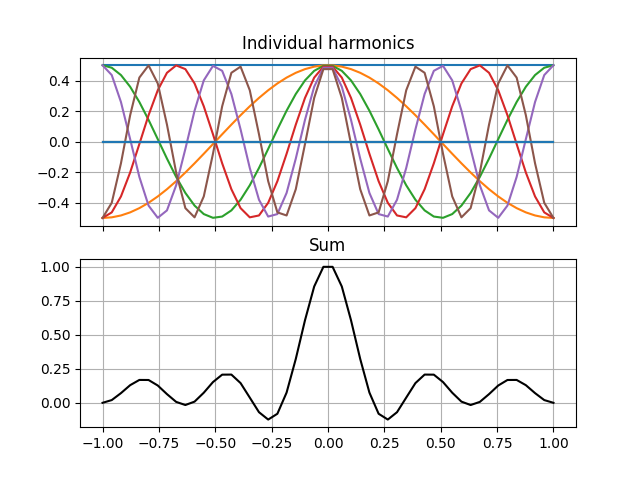

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interact, widgets
%matplotlib widget

x = np.linspace(-1, 1)

fig, (ax1, ax2)=plt.subplots(nrows=2, sharex='col')
N = 5

def change_coefficients(**kwargs):
    ax1.clear()
    ax2.clear()
    
    total = 0 
    
    for item, value in kwargs.items():
        term  = value * np.cos(int(item[1])*np.pi*x) * (item[0]=='a') + value * np.sin(int(item[1])*np.pi*x) * (item[0]=='b')
        total = total + term 
        
        ax1.plot(x, term, label=item)
    
    ax2.plot(x, total/np.max(total), 'k')
    
    ax2.grid()
    ax1.grid()
    ax1.set_title('Individual harmonics')
    ax2.set_title('Sum')
    

sa = [widgets.FloatSlider(description='a{}'.format(n), min=-1, max=1, step=0.1, value=0.5) for n in range(N+1)]
sb = [widgets.FloatSlider(description='b{}'.format(n), min=-1, max=1, step=0.1, value=0) for n in range(1,N+1)]

# Link sliders to function
out = widgets.interactive_output(change_coefficients, {**{f'a{i}': s for i, s in enumerate(sa)}, **{f'b{i+1}': s for i, s in enumerate(sb)}})

# Layout sliders in two rows
col1 = widgets.VBox(sa)
col2 = widgets.VBox(sb)
layout = widgets.HBox([col1, col2, out])

# Display everything
display(layout)


## The finite rod of length $L$ and the Fourier sine series

So we have potentially infinite solutions at the moment, though we know that a physical problem ought to have just one answer. To find a particular solution to a particular problem we need to specify initial and boundary conditions so we can narrow things down. After all, what the temperature looks like along a material will depend on the situation.

We might say that our rod is finite, of length $L$ and that $u=0$ at $x=0$ and $x=L$. This way we're fixing the temperature at both ends of the rod (by fixing zeroes at the boundaries we are technically applying *Dirichlet boundary conditions*). Let's do this by choosing one of the valid solutions above: $X(x)=A\sin{k x}$. At $x=0$ we have:

$$X(0)=A\sin{(k \cdot 0)}=0$$

This is automatically satisfied by the $\sin$ function, no matter what $k$ is. So $X=A \sin(k x)$ is a solution! We were a little lucky here that we picked the right form immediately. But we have no idea what $k$ or $A$ are. So off we go to the other end of the rod, $x=L$:

$$X(L)=A\sin{(k \cdot L)}=0$$

Now we're in trouble, because there are multiple (discrete) values of $k$ that fulfill this condition, but at least we know what they are:

$$
k_n \in \left\{\frac{\pi}{L}, \frac{2 \pi}{L}, \frac{3\pi}{L}, ...\right\}
$$

So:

$$
k_n = \frac{n \pi}{L}
$$

for $n \in \{ 1, 2, 3, ... \}$


The units of $k$ are interesting here: an inverse length. We can call $k$ a spatial frequency, and $\sin(k_n x)$ the shape of a spatial harmonic, or mode.

Technically $\sin(k x)$ are *eigenfunctions* (the mode shapes) of the spatial part of the heat equation and $X(x)$, and $k_n^2$ are the *eigenvalues*. The eigenvalues $k_n^2$ here tell us two things: how quickly each mode the temperature "oscillates" in space, but also how quickly it decays over time at a particular mode, since they end up in the temporal distribution $e^{-\lambda t}$.

Now we also have a value for the constant $\lambda$ (it also has infinite values now):

$$\lambda_n = D k_n^2 = D\left(\frac{n\pi}{L}\right)^2$$

Importantly, for every value of $k_n$ we may have a different constant $A_n$. We can't tell what these constants are as there's not enough information. So, the solution so far is an infinite sum of sines with unknown coefficients $A_n$:

$$
u=X(x)\cdot T(t) = \sum_{n=1}^{\infty}A_n \sin\left(k_n x\right) \cdot e^{-D k_n^2 t}
$$

For completeness, we could have arrived here starting with a more general solution for the spatial dependence:

$$X(x)=A\sin(k x) + B\cos(k x)$$

When fixing the first boundary at $x=0$ to zero we get:

$$X(0)=0=A\sin(k \cdot 0) + B\cos(k \cdot 0)=B$$

So we immediately find $B=0$, and our solution is still just $X(x)=A \sin(k x)$.

It's clear $X(x)=B\cos{k x}$ on its own doesn't work (you can try) unless $B=0$ and temperature is zero everywhere and always. But it could nonetheless be a solution to a slightly different problem! Sine and cosine are after all only 90 degrees apart.

Now, back to the final form of $X(x)$:

$$
X(x)=\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right)
$$

This we call a Fourier sine series. This is saying that if $X(x)$ is to satisfy our boundary conditions, it must be representable as an infinite sum of harmonics, and only sines. Or, conversely, a function that is the infinite sum of such harmonics automatically satisfies our boundary conditions. We can easily tell that the conditions are satisfied because no matter what $n$ or $L$ are, at $x=0$ and $x=L$ all elements of the sum have a value of zero.

Some important features of $X(x)$ at this point: 
* Since the sine function is odd, the function $X(x)$ must be odd (any sum of odd functions is itself odd).
* $X(x)$ is also periodic, with period $T=2L$, since all the elements in the sum are periodic with period $T=2L$.
* Higher harmonics, with $n>1$ are periodic over shorter periods, but their arguments are integer multiples of the sine for $n=1$ and thus are still periodic over $2L$.



## Orthogonality

So how do we move on from here and get the coefficients $A_n$? We can specify what the temperature looks like initially, at time $t=0$. Let's start by saying that, at time zero, the temperature distribution follows some function $f(x)$. We know this $f(x)$ depends on $x$ only, so we can assume this can only apply to our spatial dependence $X(x)$. Since $X(x)$ does not depend on time (we already assumed this), then $f(x)$ and $X(x)$ are the same down to a constant. We're actually going to play fast and loose with constants here, since it doesn't particularly matter whether they belong to the time-dependent or the space-dependent components. So for all intents and purposes, $f(x)=X(x)$. 

$$
u(x,0)=f(x)=X(x)\cdot T(0) =\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right)
$$

We have the function $f(x)$ in terms of the coefficients $A_n$ but finding them still seems hard. Here is where we have to take a little detour into a very important property of these mode shapes: orthogonality. 

Let's take a step back, and assume $L=1$ for simplicity. Consider the function $f(x)=\sin(\pi x)$. The square of $f(x)$ is:

$$f^2(x)=\sin^2(\pi x)$$

A square of a real number, as we know, is always positive. The area under this curve in the interval $[0,1]$ should then be some finite, positive value:

$$
\int_0^1f^2(x) dx=\int_0^1\sin^2(\pi x) dx=\frac{1}{2}
$$

We're integrating here over half a cycle of the sine function (squared). This integral can be worked out fairly easily by considering that, over a quarter cycle (and multiples of quarter cycles), the squares of sine and cosine have the same area: 

so that $$\int_0^1 \sin^2(\pi x) dx= \frac{1}{2} \int_0^1 \left[\cos^2(\pi x)+\sin^2(\pi x)\right] dx= \frac{1}{2}$$

Now consider, instead, that we multiply $f(x)$ with another (slightly different) function $g(x)=\sin({\color{Red} 2}\pi x)$, so that $h(x)=f(x)\cdot g(x)$. The arguments of the sine function differ between $f(x)$ and $g(x)$, so the area under the curve is sometimes positive, sometimes negative. It turns out that the positive side of $f\cdot g$ is equal to the negative side, and its integral evaluates to zero!

$$\int_0^L \sin\left(\frac{\pi}{L} x\right)\sin\left(2\frac{\pi}{L} x\right) dx =  0$$

This is true for the more general case of two functions: 

\begin{align}
f(x)=\sin\left(\frac{m \pi}{L} x\right) \\ 
g(x)=\sin \left(\frac{n \pi}{L} x\right)
\end{align}

The integral of $f\cdot g$ over the interval $[0,1]$ will always be zero, unless $m=n$ in which case it will be $\int_0^1 \sin^2(n \pi x)=1/2$. Now this relation in proper notation:

\begin{equation}
  \int_0^L \sin\left(\frac{m \pi}{L} x\right) \cdot \sin \left(\frac{n \pi}{L} x\right) dx=\begin{cases}
    \frac{L}{2}, & \text{if $m=n$}.\\
    0, & \text{if $m\neq n$}.
  \end{cases}
\end{equation}

This integral acts as a continuous analogue of a vector dot product, or inner product. It is checking for "alignment" between $f(x)$ and $g(x)$. Two vectors are said to be orthogonal if their inner product is zero: $\vec{a}\cdot \vec{b} = \sum_i a_i b_i$. So we are finding here that modes with different indices $m$ and $n$ are orthogonal to each other. This property is extremely useful to carry on solving the heat equation (and the wave equation as we'll see).

In the code below we can vary $m$ and $n$ and see what happens to the product of $f(x)$ and $g(x)$. 

interactive(children=(FloatSlider(value=3.0, description='m', max=15.0, min=1.0, step=1.0), FloatSlider(value=…

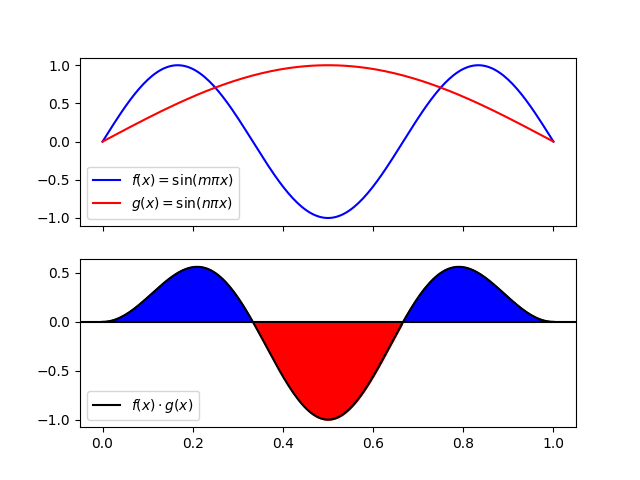

In [40]:
plt.close()
x = np.linspace(0,1, 200)
fig, (ax1,ax2) =plt.subplots(nrows=2, sharex='col')
ax1.set_ylim((-1.1,1.1))
ax2.set_ylim((-1.1,1.1))

ax1.set_title('')
ax1.set_axis_off()
ax2.set_axis_off()

def change_coefficients(m,n):

    ax1.clear()
    ax2.clear()
    
    f = np.sin(m*np.pi*x)
    g = np.sin(n*np.pi*x)
    fg = f*g
    
    ax1.plot(x, f, 'b', label=r'$f(x)=\sin(m\pi x)$')
    ax1.plot(x, g, 'r', label=r'$g(x)=\sin(n\pi x)$')

    ax2.plot(x, fg, 'k', label=r'$f(x)\cdot g(x)$')
    ax2.fill_between(x, fg, where=fg>0, color='b')
    ax2.fill_between(x, fg, where=fg<0, color='r')
    ax1.legend(loc='lower left')
    ax2.legend(loc='lower left')

    ax2.axhline(0, color='k')

    
interact(change_coefficients, m=FloatSlider(min=1, max=15, step=1, value=3, description='m'), 
         n=FloatSlider(min=1, max=15, step=1, value=1, description='n'),
        );



Notice here that when $f$ and $g$ don't line up, the red and blue shaded areas of $f\cdot g$ are equal!

## The solution

Now we have a way of isolating each spatial harmonic. Let's go back to our temperature distribution and try to apply the initial condition, the shape $f(x)$:

$$f(x)=\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right)$$

Now we multiply both sides by $g(x)=\sin\left(\frac{m\pi}{L} x\right)$, picking a single (integer) value of $m$:

$$f(x){\color{Red}\cdot\sin\left(\frac{m\pi}{L} x\right)}=\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right){\color{Red}\cdot\sin\left(\frac{m\pi}{L} x\right)}$$

Now we integrate both sides over the interval $[0,L]$:

$$\int_0^Lf(x){\color{Red}\cdot\sin\left(\frac{m\pi}{L} x\right)} dx=\int_0^L\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right){\color{Red}\cdot\sin\left(\frac{m\pi}{L} x\right)}dx $$

Now, almost by magic, all but one of the terms in the sum on the right side vanish! Where $m\neq n$, the integral of a term returns zero, and where $m=n$ it has a value of $A_n L/2$. On the left hand side, the integral remains (since we haven't specified $f(x)$). We can now, one at a time, plug in different values of $m$ and obtain a single equation without infinite sums (though we have traded this for infinite equations...):

$$\int_0^Lf(x){\color{Red}\cdot\sin\left(\frac{m\pi}{L} x\right)} dx=\frac{L}{2}A_m$$



What's great here is that we now have a formula for the coefficients $A_n$:

$$A_n = \frac{2}{L}\int_0^Lf(x){\color{Red}\cdot\sin\left(\frac{n\pi}{L} x\right)} dx$$

So here's our full temperature distribution:

$$
u(x,t)= \sum_{n=1}^{\infty}A_n \sin\left(k_n x\right) e^{-D k_n^2 t}
$$
where $$A_n = \frac{2}{L}\int_0^Lf(x)\sin\left(\frac{n\pi}{L} x\right) dx$$

So to get the coefficients, we need to apply a transformation to the function $f(x)$ (which remember is our initial distribution). This allows us to represent $f(x)$ as a sum of harmonics. The shapes of the harmonics are fixed, but their amplitudes vary depending on the function. Some functions (like a simple sine wave $f(x)= \sin(\pi x)$ will only contain one harmonic. We can expect, by orthogonality, that in carrying out the transform for $\sin(\pi x)$ all coefficients but one will be zero.

Thinking about our inner product analogy, we see that to find each coefficient $A_n$, we must find the inner product of the initial distribution $f(x)$ and each mode shape $\sin\left(\frac{n\pi}{L} x\right)$. In other words, **how much of the frequency $k_n$ is contained in the distribution $f(x)$**.

The beauty of this kind of decomposition is that lots of functions can be represented that do not have a closed form, and solutions to differential equations can be arrived at and computed quickly. 

Let's solve the problem by setting a temperature boundary condition:

$u(L, t) = 1$ and $u(0, t)=0$

Then to satisfy the boundary condition we need:



## Towards the Fourier transform

Nothing in our derivation so far is restricting how large the length of the rod $L$ can be. The orthogonality of sine functions should apply for any $L$, so we can ask ourselves what would happen if we increasd $L$ indefinitely. 

We will find that the spatial frequencies come closer and closer together, since:

$$k_n=\frac{n \pi}{L}$$

Let's look at a few increasing values of $L$:

\begin{aligned}
L = 1 &\Rightarrow k_n = \{\pi, 2\pi, 3\pi, \dots\} \\
L = 10 &\Rightarrow k_n = \left\{\frac{\pi}{10}, \frac{2\pi}{10}, \frac{3\pi}{10}, \dots\right\} \\
L = 100 &\Rightarrow k_n = \left\{\frac{\pi}{100}, \frac{2\pi}{100}, \frac{3\pi}{100}, \dots\right\}
\end{aligned}


As $L\to \infty$, the interval $\Delta k=\pi/L$ between successive modes becomes smaller, and the modes $k_n$ start to resemble a continuum $k$. 

Let's first look at the individual coefficients $A_n$, in terms of $k_n$ and $\Delta k$:

$$
A(k_n)= \frac{2\Delta k}{\pi} \int_0^{\pi/\Delta k} f(x) \sin(k_n x) dx
$$

We'll define an amplitude function $F(k_n)=A_n/\Delta k$. The units of $F(k_n)$ are of amplitude per unit frequency. As we reduce the spacing, the upper limit of integration goes to infinity. In the limit as $\Delta k \to 0$:

$$F(k)=\frac{2}{\pi} \int_0^{\infty} f(x) \sin(k x) dx$$

And this is the Fourier sine transform! As for the finite rod, it's still telling us how much of a given frequency is contained in the function $f(x)$, except we're looking at a continuous spectrum of frequencies from zero to infinity.

Let's go back and plug $F(k_n)$ into our Fourier series for the function $f(x)$, still summing over discrete modes $k_n$ though they're rapidly getting closer and closer! Remembering that $F(k_n)=A(k_n)/\Delta k$: 

$$f(x)=\sum_{k_n} F(k_n) \sin\left(k_n x\right) \Delta k$$

This resembles a Riemann sum, and in the limit as $\Delta k \to 0$ we obtain the integral representation:

$$f(x)=\int_0^{\infty} F(k) \sin\left(k x\right) dk$$

And we have the inverse sine transform! This is reconstructing the function $f(x)$ from its amplitudes $F(k)$.

So our sine transform pair is:

$$
\boxed{
\begin{array}{rl}
F(k) &= \dfrac{2}{\pi} \int_0^\infty f(x) \sin(k x)\, dx \\
f(x) &= \int_0^\infty F(k) \sin(k x)\, dk
\end{array}
}
$$

## General Fourier series

We got to the Fourier sine series, which can be used to express odd and periodic functions. The Fourier cosine series, which represents even and periodic functions, can be arrived at in a similar way by shifting the zeros of our heat problem.

For the general case, we have the Fourier series for a periodic function $f(x)$ with period $2L$ that we showed at the beginning:

$$
f(x) = a_0 + \sum_{n=1}^{\infty}\left[a_n \cosn  + b_n \sinn \right]
$$

Note a few things here: the zeroth coefficient $a_0$ is interesting. $a_0$ is the mean value $f_0$ over the period $2L$. We know this because the average value of the oscillatory components, the sines and cosines, is zero over their period!

We can obtain the coefficients $a_n$ and $b_n$ by integration. $\sin(x)$ and $\cos(x)$ are orthogonal to each other (it's easy to see they are 90 degrees apart!), so that

$$
\int_0^L \sinn \cosn\, \diff x= 0 
$$

So the sine and cosine components of a function $f(x)$ can be extracted by integration separately:

$$
a_n = \frac{2}{L} \int_0^L f(x) \cosn \diff x
$$


$$
b_n = \frac{2}{L} \int_0^L f(x) \sinn \diff x
$$

Since $a_0$ is the mean value of $f(x)$, we can use simple integration of $f(x)$ over the period 2L to extract that value:

$$a_0 = \frac{1}{L} \int_0^L f(x)$$

This is the same as carrying out a Fourier cosine transform for a periodic function, but with $n=0$ (so that there is no oscillation).

We should try to do this numerically for a few arbitrary functions $f(x)$ of different types. The code below extracts the coefficients for the function $f(x)=x^2$. It's an even function, so what can we say about the coefficients? Try to plug in different functions and see what the coefficients are.


,1,2,3,4,5,6,7,8,9,10
a_n,0.0,0.0,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
b_n,-4.0,1.0,-0.44,0.25,-0.16,0.11,-0.08,0.06,-0.05,0.04


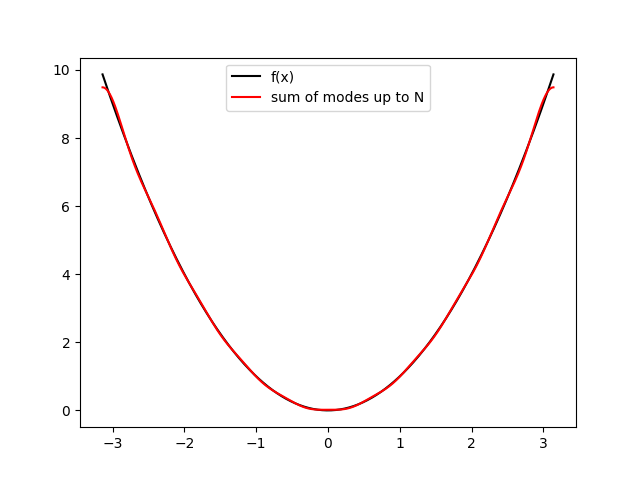

In [49]:
import pandas as pd
from IPython.display import display, HTML
plt.close()
x = np.linspace(-np.pi, np.pi, 500)

N = 10 # number of coefficients to extract 

# f(x)
f = x**2 # x^2 isn't periodic, but it's even! By carrying out the integration, we will construct a periodic function with period 2*pi, 
         # with the same shape as x^2 within each interval!

fs = np.zeros_like(f) # initialise Fourier series 

a0 = np.trapz(f, x)/(2*np.pi)

fs = fs + a0 # add zeroth coefficient 
an = np.zeros(N)
bn = np.zeros(N)

for n in range(1,N+1):
    an[n-1] = 1/np.pi * np.trapz(f*np.sin(n*x), x)
    bn[n-1] =  1/np.pi * np.trapz(f*np.cos(n*x), x)
    fs = fs + an[n-1] * np.sin(n*x) + bn[n-1] * np.cos(n*x)
    
data = np.round(np.vstack((an, bn)), 2)

df = pd.DataFrame(data=data,   
              index=('a_n','b_n'),    
             columns=range(1,N+1))  

display(HTML(df.to_html()))

fig, ax = plt.subplots()
ax.plot(x,f, 'k', label='f(x)')
ax.plot(x,fs, 'r', label='sum of modes up to N')
ax.legend()
    
